<a href="https://colab.research.google.com/github/mahhhdy/SBU_DataMining_Python/blob/main/regression_on_ltc_values2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#initial lib

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from google.colab import drive
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# from statsmodels.sandbox.regression.predstd import wls_prediction_std

drive.mount('/content/drive')
path='/content/drive/MyDrive/DataSets/LTC_1H.xlsx'

df=pd.read_excel(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
#@title Check for null value
df.isnull().sum()

openTime    0
open        0
high        0
low         0
close       0
volume      0
dtype: int64

In [95]:
#@title cast timestamp column

# change openTime column to string 
df.openTime  = df.openTime.astype(str)

# get substring of open time column
df.openTime =  df.openTime.str.slice(stop=10)

In [96]:
df.openTime = pd.to_datetime(df.openTime,unit='s')

In [97]:
df['ind'] = df.index
df['mean'] = (df.open+df.high+df.low+df.close)/4
columns=['open','close','high','low','volume','openTime']
df.drop(columns,axis=1,inplace=True)


In [98]:
num=100
x=df['ind'].tail(num).values
y=df['mean'].tail(num).values

# s is set for dot size
# plt.scatter(X, Y,s=5)
# plt.scatter(X, Y + np.std(Y),c='y')
# plt.scatter(X, Y - np.std(Y),c='y')
# plt.show()

# just for test , I have to remove this part

In [99]:
# nsample = 50
# sig = 0.5
# x = np.linspace(0, 20, nsample)
# X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
# beta = [0.5, 0.5, -0.02, 5.]

# y_true = np.dot(X, beta)
# y = y_true + sig * np.random.normal(size=nsample)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


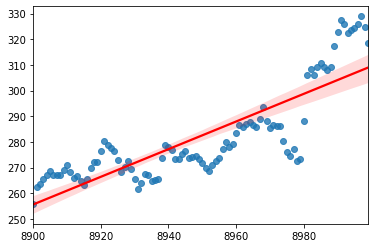

In [100]:
sns.regplot(x,y,line_kws={'color':'red'})
plt.xlabel='mean'
plt.ylabel='ind'
plt.title='Regression on LTH Mean Price'

In [101]:
df = pd.DataFrame()
df['x']=x
df['y']=y

df['xy'] = df.x * df.y
df['x2'] = df.x**2
df['y2'] = df.y**2
df['x-xavg**2'] = (df.x - df.x.mean())**2
df['y-yavg**2'] = (df.y - df.y.mean())**2

In [102]:
def lin_regr_func(x,y):
    n = len(x)
    # denominator
    d = (n*(x**2).sum()-x.sum()**2)
    # intercept
    a = (y.sum()*(x**2).sum()-x.sum()*(x*y).sum())/d
    # slope
    b = (n*(x*y).sum()-x.sum()*y.sum())/d
    
    y_pred = x*b+a
    yyi = (y-y_pred)**2
    xxi = (x.mean()-x)**2
    #standard error
    sb = np.sqrt(yyi.sum()/(n-2))/np.sqrt(xxi.sum())
    
    # correlation coefficient
    corr_coeff = (n*(x*y).sum() - x.sum()*y.sum())/(np.sqrt(n*(x**2).sum()-x.sum()**2)*np.sqrt((n*(y**2).sum()-y.sum()**2)))
    return a,b,corr_coeff,sb

In [103]:
a,b,corr_coeff,sb=lin_regr_func(x,y)

df['y_pred']=df['x']+b+a
df['err']=df['y']-df['y_pred']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


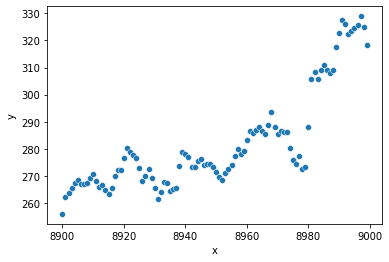

In [104]:
sns.scatterplot('x','y',data=df)
plt.xlabel='mean'
plt.ylabel='ind'
# sns.lineplot('x','y',color='red',data=df)
plt.title='Regression on LTH Mean Price'